In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('cereal.csv')

In [3]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


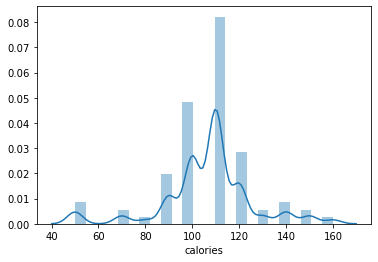

In [4]:
#what's the calorie/100g distribution
sns.distplot(df['calories'])

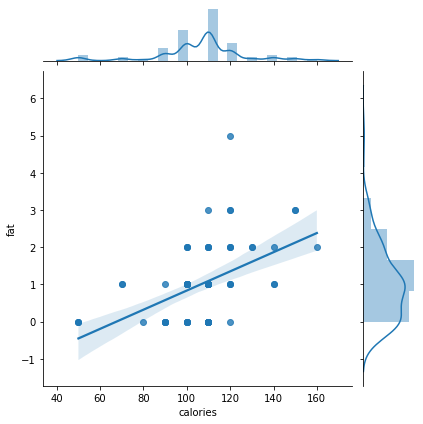

In [5]:
#is there a corellation between calories and fat in the cereal?
sns.jointplot(x='calories',y='fat',data=df, kind='reg')

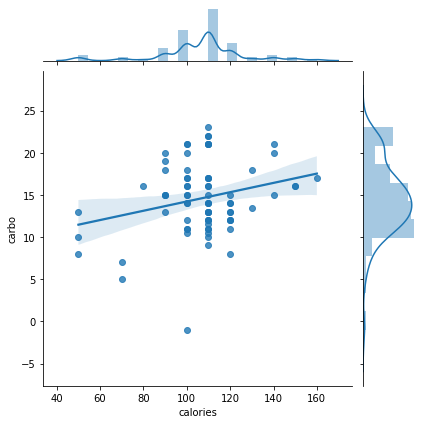

In [6]:
#how about calories and carbs in the cereal?
sns.jointplot(x='calories',y='carbo',data=df, kind='reg')

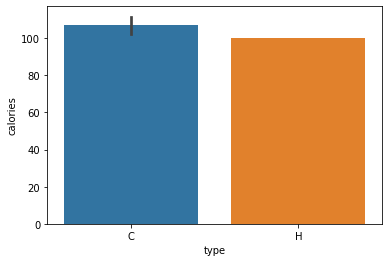

In [7]:
#is there a difference between hot and cold cereals when it comes to calories?
sns.barplot(x='type',y='calories',data=df)

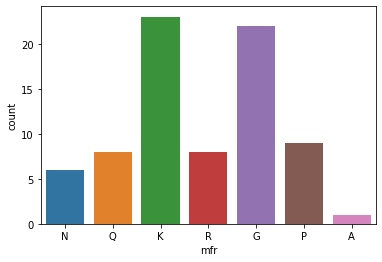

In [8]:
#let's leave the poor calories and check out the manufacturers
sns.countplot(x='mfr',data=df)

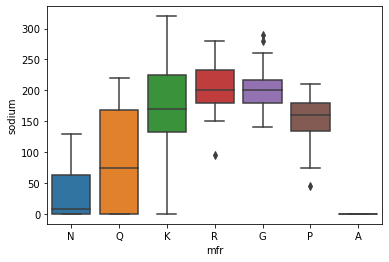

In [9]:
#so Kellogs and General Mills have the most cereals, how about sodium amount in each manufacturer?
sns.boxplot(x="mfr", y="sodium", data=df)

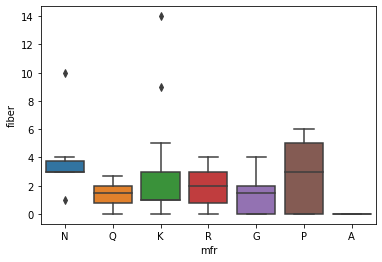

In [10]:
#seems like Nabisco and Quaker Oats are the safest choice for people minding their sodium intake
#how about fiber then?
sns.boxplot(x="mfr", y="fiber", data=df)

In [11]:
#I would stay with Nabisco here but seems like Post has the biggest variety in this regard - worth checking out is also Kellogs with two outliers with really high fiber
df[df['fiber']>8][['name', 'mfr', 'fiber']].sort_values('fiber', ascending=False)

,name,mfr,fiber
3,All-Bran with Extra Fiber,K,14.0
0,100% Bran,N,10.0
2,All-Bran,K,9.0


In [12]:
#this is my choice of breakfast

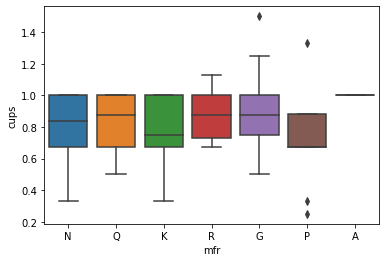

In [13]:
#which brand gives you biggest portion in one serving? let's check both weight and cups
sns.boxplot(data=df, x='mfr', y='cups')



In [14]:
#so mostly one serving is one ounce and it's somewhere between 0.7-1 cup for most cereals
#I like to feel full so let's check out the outliers that serve more than 1.2 cups or more than 1.2 ounce
df[(df['cups']>1.2) | (df['weight']>1.2)][['name', 'mfr', 'cups', 'weight', 'calories']].sort_values('calories', ascending=False)

,name,mfr,cups,weight,calories
46,Mueslix Crispy Blend,K,0.67,1.50,160
39,Just Right Fruit & Nut,K,0.75,1.30,140
49,Nutri-Grain Almond-Raisin,K,0.67,1.33,140
70,Total Raisin Bran,G,1.00,1.50,140
7,Basic 4,G,0.75,1.33,130
51,Oatmeal Raisin Crisp,G,0.50,1.25,130
27,Fruit & Fibre Dates; Walnuts; and Oats,P,0.67,1.25,120
28,Fruitful Bran,K,0.67,1.33,120
52,Post Nat. Raisin Bran,P,0.67,1.33,120
58,Raisin Bran,K,0.75,1.33,120


In [15]:
#those heavy cereals seem to actually have smaller serving sizes in cups :(

#let's check which cereal I can eat in the biggest volume if I want to consume 200 calories
def cups200(cups, calories):
    return (200*cups/calories)
df['cups per 200 calories'] = df[['cups','calories']].apply(lambda x: cups200(x['cups'], x['calories']), axis=1)

In [16]:
df.sort_values('cups per 200 calories', ascending=False).head(5)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cups per 200 calories
54,Puffed Rice,Q,C,50,1,0,0,0.0,13.0,0,15,0,3,0.50,1.00,60.756112,4.000000
55,Puffed Wheat,Q,C,50,2,0,0,1.0,10.0,0,50,0,3,0.50,1.00,63.005645,4.000000
40,Kix,G,C,110,2,1,260,0.0,21.0,3,40,25,2,1.00,1.50,39.241114,2.727273
63,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,2.500000
37,Honey-comb,P,C,110,1,0,180,0.0,14.0,11,35,25,1,1.00,1.33,28.742414,2.418182


In [17]:
#this means I can eat 4 cups of Puffed Rice?!

# how about the heaviest meal per 200 calories?
def weight200(weight, calories):
    return (200*weight/calories)
df['weight per 200 calories'] = df[['weight','calories']].apply(lambda x: cups200(x['weight'], x['calories']), axis=1)
df.sort_values('weight per 200 calories', ascending=False).head(5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cups per 200 calories,weight per 200 calories
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,2.000000,4.000000
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,0.942857,2.857143
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,0.942857,2.857143
68,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.0,1.00,59.363993,2.222222,2.222222
50,Nutri-grain Wheat,K,C,90,3,0,170,3.0,18.0,2,90,25,3,1.0,1.00,59.642837,2.222222,2.222222


In [18]:
#I can eat 4 ounces of All-Bran with Extra Fiber then and still meet my calorie goals, fabulous.
#let's drop cups and weight columns as they don't really give me real
df = df.drop(['weight', 'cups'], axis=1)

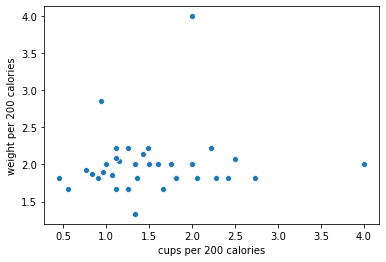

In [19]:
sns.scatterplot(x='cups per 200 calories', y='weight per 200 calories', data=df)

In [20]:
#now obviously most fun will be to check if we can predict the consumer rating based on the data we have
#let's first recode the non-numerical columns:
mfr_dummies= pd.get_dummies(df['mfr'])
df.drop('mfr', axis=1, inplace=True)
df = pd.concat([df, mfr_dummies], axis=1)


In [21]:
type_dummies= pd.get_dummies(df['type'])
df.drop('type', axis=1, inplace=True)
df = pd.concat([df, type_dummies], axis=1)

In [22]:
#to avoid having multiple columns with the same data let's drop the hot categotry
df = df.drop('H', axis=1)

In [23]:
df.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,cups per 200 calories,weight per 200 calories,A,G,K,N,P,Q,R,C
0,100% Bran,70,4,1,130,10.0,5.0,6,280,25,...,0.942857,2.857143,0,0,0,1,0,0,0,1
1,100% Natural Bran,120,3,5,15,2.0,8.0,8,135,0,...,1.666667,1.666667,0,0,0,0,0,1,0,1
2,All-Bran,70,4,1,260,9.0,7.0,5,320,25,...,0.942857,2.857143,0,0,1,0,0,0,0,1
3,All-Bran with Extra Fiber,50,4,0,140,14.0,8.0,0,330,25,...,2.000000,4.000000,0,0,1,0,0,0,0,1
4,Almond Delight,110,2,2,200,1.0,14.0,8,-1,25,...,1.363636,1.818182,0,0,0,0,0,0,1,1


In [24]:
#for X let's use all the features except for name and rating columns
X = df.drop(['name', 'rating'], axis=1)
y = df['rating']

In [25]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
#Training the Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluating my model's performance using coefficient of determination

from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.9999999999999983

In [27]:
#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(r2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [28]:
#are all the columns actually contributing to such great accuracy?

In [29]:
df.drop('rating', axis=1).corrwith(df['rating'])

calories                  -0.689376
protein                    0.470618
fat                       -0.409284
sodium                    -0.401295
fiber                      0.584160
carbo                      0.052055
sugars                    -0.759675
potass                     0.380165
vitamins                  -0.240544
shelf                      0.025159
cups per 200 calories      0.257551
weight per 200 calories    0.678888
A                          0.100155
G                         -0.370699
K                          0.064196
N                          0.527063
P                         -0.025025
Q                          0.006107
R                         -0.027393
C                         -0.203024
dtype: float64

In [30]:
#sorting the absolute values from the most relevant ones we get
df.drop('rating', axis=1).corrwith(df['rating']).abs().sort_values(ascending=False)

sugars                     0.759675
calories                   0.689376
weight per 200 calories    0.678888
fiber                      0.584160
N                          0.527063
protein                    0.470618
fat                        0.409284
sodium                     0.401295
potass                     0.380165
G                          0.370699
cups per 200 calories      0.257551
vitamins                   0.240544
C                          0.203024
A                          0.100155
K                          0.064196
carbo                      0.052055
R                          0.027393
shelf                      0.025159
P                          0.025025
Q                          0.006107
dtype: float64

In [31]:
# will the r2 score drop if we start dropping the least correlating columns?
new_X = X.drop('Q', axis=1)
#Training the Multiple Linear Regression model on new X matrix of features

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluating my model's performance
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(r2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [32]:
# will the r2 score drop if we start dropping the least correlating columns?
new_X = new_X.drop('P', axis=1)
#Training the Multiple Linear Regression model on new X matrix of features

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluating my model's performance
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(r2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [34]:
#it is still perfect, let's continue
new_X = new_X.drop('R', axis=1)
#Training the Multiple Linear Regression model on new X matrix of features

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluating my model's performance
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(r2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


In [35]:
#continuing
new_X = new_X.drop('carbo', axis=1)
#Training the Multiple Linear Regression model on new X matrix of features

X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluating my model's performance
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(r2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2.std()*100))

Accuracy: 90.11 %
Standard Deviation: 16.78 %


In [60]:
#still better than the original but slightly worse, what if we drop all the manufacturer columns as well as the shelf 
#we don't actually know if the ratings were given only after tasting the product or after buying it

tasting_only_X = X.drop(['N', 'G', 'C', 'A', 'K', 'R', 'P', 'Q', 'shelf'], axis=1)

#Training the Multiple Linear Regression model on new X matrix of features

X_train, X_test, y_train, y_test = train_test_split(tasting_only_X, y, test_size = 0.2)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

#evaluating my model's performance
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

#Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
r2 = cross_val_score(estimator = regressor, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(r2.mean()*100))
print("Standard Deviation: {:.2f} %".format(r2.std()*100))

Accuracy: 100.00 %
Standard Deviation: 0.00 %


AttributeError: 'AxesSubplot' object has no attribute '_legend'

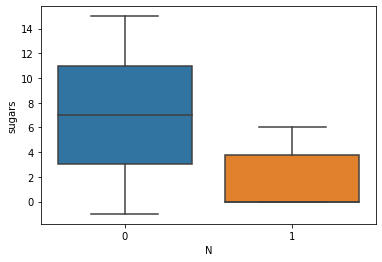

In [42]:
#great

# in correlations we noticed that Nabisco was highly positively correlated with rating
#let's check how their cereals look in comparison to others 
#when it comes to the most important features

fig = sns.boxplot(y='sugars', x='N', data=df)

# replace labels
new_labels = ['other cereals', 'Nabisco']
for t, l in zip(fig._legend.texts, new_labels): t.set_text(l)

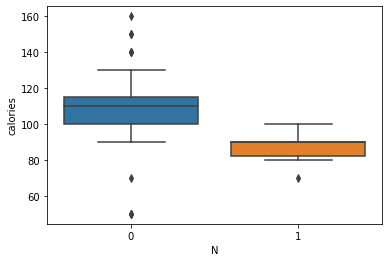

In [39]:
#so other manufactures have significantly more added sugar


sns.boxplot(y='calories', x='N', data=df)

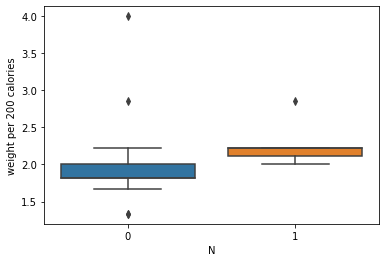

In [40]:
#they're also lower in calories per serving

sns.boxplot(y='weight per 200 calories', x='N', data=df)

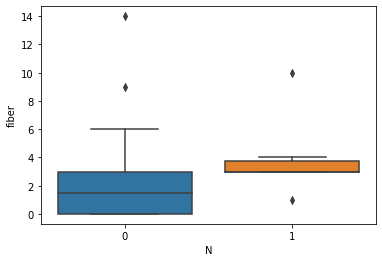

In [41]:
#you can eat heavier portion containing 200calories

sns.boxplot(y='fiber', x='N', data=df)

In [44]:
#and you will get much more fiber

#so Nabisco just makes a good product 

In [ ]:
#in conclusion:
#we managed to build a nice model predicting the rating of cereal based on it's properties
#we also explored correlation between rating and different categories
#and checked the most correlated brand to know why they're getting better ratings
# if you're planning to create a succesful cereal stick to low sugar and high fiber <3